<a href="https://colab.research.google.com/github/Deepsphere-AI/DSAI_Python_Programming/blob/main/nit-16/Python%20for%20Deep%20Learning/Program%20349-%20CSLAB_DEEP_LEARNING_NON_LINEAR_SUPPORT_VECTOR_MACHINE_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term


Step #100
Loss = 23.181833
Step #200
Loss = 11.899258
Step #300
Loss = 2.5386267
Step #400
Loss = -1.8104076
Step #500
Loss = -5.8652854


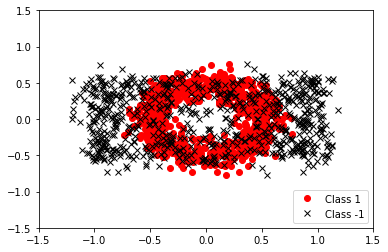

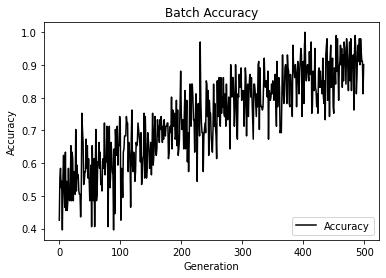

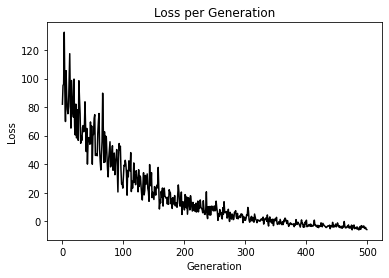

In [1]:

# *********************************************************************************************************************
  
  # File Name 	:   CSLAB_DEEP_LEARNING_NON_LINEAR_SUPPORT_VECTOR_MACHINE_V1
  # Purpose 	:   A Program in Python for Non Linear Support Vector Machine - Deep Learning
  # Author	:   Deepsphere.ai
  # Reviewer 	:   Jothi Periasamy
  # Date 	:   28/10/2022
  # Version	:   1.0	
  
# ***********************************************************************************************************************

## Program Description : Program for Non  Linear Support Vector Machine - Deep Learning in Python

## Python Development Environment & Runtime - Python, Anaconda, Tensorflow, Tensorboard

import matplotlib.pyplot as vAR_plt
%matplotlib inline

import numpy as vAR_np

import tensorflow.compat.v1 as vAR_tf

vAR_tf.disable_v2_behavior() 

from sklearn import datasets

vAR_sess = vAR_tf.Session()

vAR_CSLAB_iris = datasets.load_iris()
vAR_CSLAB_x_vals = vAR_np.array([[x[0], x[3]] for x in vAR_CSLAB_iris.data])
vAR_CSLAB_y_vals = vAR_np.array([1 if y==0 else -1 for y in vAR_CSLAB_iris.target])

vAR_CSLAB_train_indices = vAR_np.random.choice(len(vAR_CSLAB_x_vals), round(len(vAR_CSLAB_x_vals)*0.8), replace=False)

vAR_CSLAB_test_indices = vAR_np.array(list(set(range(len(vAR_CSLAB_x_vals))) - set(vAR_CSLAB_train_indices)))
vAR_CSLAB_x_vals_train = vAR_CSLAB_x_vals[vAR_CSLAB_train_indices]
vAR_CSLAB_x_vals_test = vAR_CSLAB_x_vals[vAR_CSLAB_test_indices]
vAR_CSLAB_y_vals_train = vAR_CSLAB_y_vals[vAR_CSLAB_train_indices]
vAR_CSLAB_y_vals_test = vAR_CSLAB_y_vals[vAR_CSLAB_test_indices]

vAR_CSLAB_batch_size = 101
vAR_CSLAB_x_data = vAR_tf.placeholder(shape=[None, 2], dtype=vAR_tf.float32)
vAR_CSLAB_y_target = vAR_tf.placeholder(shape=[None, 1], dtype=vAR_tf.float32)
vAR_CSLAB_prediction_grid = vAR_tf.placeholder(shape=[None, 2], dtype=vAR_tf.float32)
vAR_CSLAB_b = vAR_tf.Variable(vAR_tf.random_normal(shape=[1,vAR_CSLAB_batch_size]))

#Gaussian kernel
vAR_CSLAB_gamma = vAR_tf.constant(-50.0)
vAR_CSLAB_dist = vAR_tf.reduce_sum(vAR_tf.square(vAR_CSLAB_x_data), 1)
vAR_CSLAB_dist = vAR_tf.reshape(vAR_CSLAB_dist, [-1,1])
vAR_CSLAB_sq_dists = vAR_tf.add(vAR_tf.subtract(vAR_CSLAB_dist, vAR_tf.multiply(2., vAR_tf.matmul(vAR_CSLAB_x_data, vAR_tf.transpose(vAR_CSLAB_x_data)))), vAR_tf.transpose(vAR_CSLAB_dist))
vAR_CSLAB_my_kernel = vAR_tf.exp(vAR_tf.multiply(vAR_CSLAB_gamma, vAR_tf.abs(vAR_CSLAB_sq_dists)))

vAR_CSLAB_model_output = vAR_tf.matmul(vAR_CSLAB_b, vAR_CSLAB_my_kernel)

vAR_CSLAB_first_term = vAR_tf.reduce_sum(vAR_CSLAB_b)
vAR_CSLAB_b_vec_cross = vAR_tf.matmul(vAR_tf.transpose(vAR_CSLAB_b), vAR_CSLAB_b)
vAR_CSLAB_y_target_cross = vAR_tf.matmul(vAR_CSLAB_y_target, vAR_tf.transpose(vAR_CSLAB_y_target))
vAR_CSLAB_second_term = vAR_tf.reduce_sum(vAR_tf.multiply(vAR_CSLAB_my_kernel, vAR_tf.multiply(vAR_CSLAB_b_vec_cross, vAR_CSLAB_y_target_cross)))
vAR_CSLAB_loss = vAR_tf.negative(vAR_tf.subtract(vAR_CSLAB_first_term, vAR_CSLAB_second_term))

vAR_CSLAB_rA = vAR_tf.reshape(vAR_tf.reduce_sum(vAR_tf.square(vAR_CSLAB_x_data), 1),[-1,1])
vAR_CSLAB_rB = vAR_tf.reshape(vAR_tf.reduce_sum(vAR_tf.square(vAR_CSLAB_prediction_grid), 1),[-1,1])
vAR_CSLAB_pred_sq_dist = vAR_tf.add(vAR_tf.subtract(vAR_CSLAB_rA, vAR_tf.multiply(2., vAR_tf.matmul(vAR_CSLAB_x_data, vAR_tf.transpose(vAR_CSLAB_prediction_grid)))), vAR_tf.transpose(vAR_CSLAB_rB))
vAR_CSLAB_pred_kernel = vAR_tf.exp(vAR_tf.multiply(vAR_CSLAB_gamma, vAR_tf.abs(vAR_CSLAB_pred_sq_dist)))

vAR_CSLAB_prediction_output = vAR_tf.matmul(vAR_tf.multiply(vAR_tf.transpose(vAR_CSLAB_y_target),vAR_CSLAB_b), vAR_CSLAB_pred_kernel)
vAR_CSLAB_prediction = vAR_tf.sign(vAR_CSLAB_prediction_output-vAR_tf.reduce_mean(vAR_CSLAB_prediction_output))
vAR_CSLAB_accuracy = vAR_tf.reduce_mean(vAR_tf.cast(vAR_tf.equal(vAR_tf.squeeze(vAR_CSLAB_prediction), vAR_tf.squeeze(vAR_CSLAB_y_target)), vAR_tf.float32))

vAR_CSLAB_my_opt = vAR_tf.train.GradientDescentOptimizer(0.001)
vAR_CSLAB_train_step = vAR_CSLAB_my_opt.minimize(vAR_CSLAB_loss)
vAR_CSLAB_init = vAR_tf.global_variables_initializer()
vAR_sess.run(vAR_CSLAB_init)

vAR_CSLAB_loss_vec = []
vAR_CSLAB_batch_accuracy = []
for i in range(500):
    vAR_CSLAB_rand_index = vAR_np.random.choice(len(vAR_CSLAB_x_vals_train), size=vAR_CSLAB_batch_size)
    vAR_CSLAB_rand_x = vAR_CSLAB_x_vals_train[vAR_CSLAB_rand_index]
    vAR_CSLAB_rand_y = vAR_np.transpose([vAR_CSLAB_y_vals_train[vAR_CSLAB_rand_index]])
    vAR_sess.run(vAR_CSLAB_train_step, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_rand_x, vAR_CSLAB_y_target: vAR_CSLAB_rand_y})
    
    vAR_sess.run(vAR_CSLAB_train_step, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_rand_x, vAR_CSLAB_y_target: vAR_CSLAB_rand_y})
    vAR_CSLAB_temp_loss = vAR_sess.run(vAR_CSLAB_loss, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_rand_x, vAR_CSLAB_y_target: vAR_CSLAB_rand_y})
    vAR_CSLAB_loss_vec.append(vAR_CSLAB_temp_loss)
    
    vAR_CSLAB_acc_temp = vAR_sess.run(vAR_CSLAB_accuracy, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_rand_x,vAR_CSLAB_y_target: vAR_CSLAB_rand_y,vAR_CSLAB_prediction_grid:vAR_CSLAB_rand_x})
    vAR_CSLAB_batch_accuracy.append(vAR_CSLAB_acc_temp)
    
    if (i+1)%100==0:
        print('Step #' + str(i+1))
        print('Loss = ' + str(vAR_CSLAB_temp_loss))
        
vAR_CSLAB_x_min, vAR_CSLAB_x_max = vAR_CSLAB_x_vals[:, 0].min() - 1, vAR_CSLAB_x_vals[:, 0].max() + 1
vAR_CSLAB_y_min, vAR_CSLAB_y_max = vAR_CSLAB_x_vals[:, 1].min() - 1, vAR_CSLAB_x_vals[:, 1].max() + 1
vAR_CSLAB_xx, vAR_CSLAB_yy = vAR_np.meshgrid(vAR_np.arange(vAR_CSLAB_x_min, vAR_CSLAB_x_max, 0.02),vAR_np.arange(vAR_CSLAB_y_min, vAR_CSLAB_y_max, 0.02))
vAR_CSLAB_grid_points = vAR_np.c_[vAR_CSLAB_xx.ravel(), vAR_CSLAB_yy.ravel()]
[vAR_CSLAB_grid_predictions] = vAR_sess.run(vAR_CSLAB_prediction, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_rand_x, vAR_CSLAB_y_target: vAR_CSLAB_rand_y,vAR_CSLAB_prediction_grid: vAR_CSLAB_grid_points})
vAR_CSLAB_grid_predictions = vAR_CSLAB_grid_predictions.reshape(vAR_CSLAB_xx.shape)

(vAR_CSLAB_x_vals, vAR_CSLAB_y_vals) = datasets.make_circles(n_samples=1500, factor=.5, noise=.1)

vAR_CSLAB_y_vals = vAR_np.array([1 if y==1 else -1 for y in vAR_CSLAB_y_vals])

vAR_CSLAB_class1_x = [x[0] for i,x in enumerate(vAR_CSLAB_x_vals) if vAR_CSLAB_y_vals[i]==1]
vAR_CSLAB_class1_y = [x[1] for i,x in enumerate(vAR_CSLAB_x_vals) if vAR_CSLAB_y_vals[i]==1]
vAR_CSLAB_class2_x = [x[0] for i,x in enumerate(vAR_CSLAB_x_vals) if vAR_CSLAB_y_vals[i]==-1]
vAR_CSLAB_class2_y = [x[1] for i,x in enumerate(vAR_CSLAB_x_vals) if vAR_CSLAB_y_vals[i]==-1]

vAR_plt.contourf(vAR_CSLAB_xx, vAR_CSLAB_yy, vAR_CSLAB_grid_predictions, cmap=vAR_plt.cm.Paired, alpha=0.8)
vAR_plt.plot(vAR_CSLAB_class1_x, vAR_CSLAB_class1_y, 'ro', label='Class 1')
vAR_plt.plot(vAR_CSLAB_class2_x, vAR_CSLAB_class1_y, 'kx', label='Class -1')
vAR_plt.legend(loc='lower right')
vAR_plt.ylim([-1.5, 1.5])
vAR_plt.xlim([-1.5, 1.5])
vAR_plt.show()

vAR_plt.plot(vAR_CSLAB_batch_accuracy, 'k-', label='Accuracy')
vAR_plt.title('Batch Accuracy')
vAR_plt.xlabel('Generation')
vAR_plt.ylabel('Accuracy')
vAR_plt.legend(loc='lower right')
vAR_plt.show()

vAR_plt.plot(vAR_CSLAB_loss_vec, 'k-')
vAR_plt.title('Loss per Generation')
vAR_plt.xlabel('Generation')
vAR_plt.ylabel('Loss')
vAR_plt.show()

    
# ****************************************************************************************************************************
#   Disclaimer.

# We are providing this code block strictly for learning and researching, this is not a production
# ready code. We have no liability on this particular code under any circumstances; users should use
# this code on their own risk. All software, hardware and othr products that are referenced in these 
# materials belong to the respective vendor who developed or who owns this product.

# ****************************************************************************************************************************
  